In [19]:
import torch 
from torch import nn
from d2l import torch as d2l

## 定义模型
class Reshape(torch.nn.Module):  # 在PyTorch中，forward 函数是定义在 nn.Module 子类中的一个方法，它定义了数据通过网络的前向传播路径。当你创建一个自定义的神经网络层或整个网络时，你需要重写（override）这个方法以指定数据如何通过你的网络层。
    def forward(self, x):  # 执行前向传播：在 forward 方法内部，你会定义一系列的操作，这些操作将输入数据 x 转换为输出数据。这些操作可能包括线性变换（使用 nn.Linear）、卷积（使用 nn.Conv2d）、池化（使用 nn.MaxPool2d）、激活函数（如 torch.relu）、归一化（如 nn.BatchNorm2d）等。
        return x.view(-1, 1, 28, 28)  # 批量数不变，通道数 1
        # 返回输出数据：forward 方法会返回经过一系列操作处理后的输出数据。这个输出数据将作为下一个网络层或网络组件的输入，或者如果这是网络的最后一层，则作为整个网络的最终输出。

net = nn.Sequential(
    Reshape(),  # 输入
    
    nn.Conv2d(1, 6, kernel_size = 5, padding = 2),  # 输入通道数，输出通道数，padding = 2 (28+2+2=32)
    #输出 6@28*28
    nn.Sigmoid(),  # 得到非线性性 
    # nn.Sigmoid() 函数在PyTorch框架中通常不需要除了inplace之外的额外参数。inplace是一个可选参数，用于指定是否直接在原输入数据上进行操作，以节省内存。如果inplace=True，则函数会直接在输入数据上进行修改，不返回新的数据；如果inplace=False（默认值），则函数会返回一个新的数据，原输入数据保持不变。
    # nn.Sigmoid() 在 PyTorch 中是一个元素级操作
    nn.AvgPool2d(kernel_size = 2, stride = 2), 
    # 输出 6@14*14

    nn.Conv2d(6, 16, kernel_size = 5),
    # 输出 16@10*10
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size = 2, stride = 2),
    # 输出 16@5*5

    nn.Flatten(),  # nn.Flatten() 在 PyTorch 的神经网络模块（torch.nn）中通常不需要参数。它的作用是将输入的多维张量（tensor）展平成一维的，以便可以用作全连接层（nn.Linear）或其他需要一维输入的层的输入。
    nn.Linear(16*5*5, 120),  # nn.Linear 是 PyTorch 深度学习框架中的一个类，用于定义线性变换（全连接层）
    # nn.Linear(in_features, out_features)
    # nn.Linear层接受一个二维张量作为输入，其中第一维是批次大小（batch_size），第二维是每个样本的特征数量。输出也是一个二维张量，其中第一维仍然是批次大小（与输入相同），第二维是你通过out_features参数指定的输出特征数量。
    nn.Sigmoid(),
    
    nn.Linear(120, 84),
    nn.Sigmoid(),
    
    nn.Linear(84, 10))  # 10是输出类别数

# nn.Conv2d(), nn.Flatten() 等都是 PyTorch 深度学习框架中 torch.nn 模块下的类

In [20]:
# nn.Sequential构建的对象是什么类型

# nn.Sequential 构建的对象是 Module 类型的神经网络对象。在 PyTorch 中，nn.Sequential 是一个有序容器，它按照传入构造器的顺序将神经网络层（如线性层、激活函数层、池化层等）组合成一个序列，以构建神经网络模型。
# 具体来说，当你使用 nn.Sequential 并将神经网络层作为参数传入时，这些层会被依次添加到容器中。然后，当你调用这个 nn.Sequential 对象的 forward 方法时，它会按照容器中层的顺序自动依次计算并输出结果。这样，你就可以将整个 nn.Sequential 容器视为一个单一的神经网络模块，简化了模型的构建和调用过程。
# nn.Sequential 容器不仅支持以参数列表的形式传入层，还支持以 OrderedDict（有序字典）的形式传入层，这允许你为每一层指定一个自定义的名称，以便更好地管理和调试模型。
# 总结来说，nn.Sequential 构建的对象是 Module 类型的神经网络对象，它提供了一种便捷的方式来构建和调用神经网络模型。

In [21]:
## 检查模型
print(net[0],'\n')
print(net[1],'\n')
print(net[2],'\n')
print(net,'\n')

x = torch.rand(size=(1, 1, 28, 28) , dtype = torch.float32)

for layer in net:
    x = layer(x)
    print(layer.__class__.__name__, 'output shape: \t', x.shape)  # __class__和__name__是 是Python对象系统中的通用属性

Reshape() 

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)) 

Sigmoid() 

Sequential(
  (0): Reshape()
  (1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (2): Sigmoid()
  (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (5): Sigmoid()
  (6): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (7): Flatten(start_dim=1, end_dim=-1)
  (8): Linear(in_features=400, out_features=120, bias=True)
  (9): Sigmoid()
  (10): Linear(in_features=120, out_features=84, bias=True)
  (11): Sigmoid()
  (12): Linear(in_features=84, out_features=10, bias=True)
) 

Reshape output shape: 	 torch.Size([1, 1, 28, 28])
Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 

In [22]:
# LeNet在 Fashion-MNIST 数据上的表现

batch_size = 256
def get_dataloader_workers():  
    return 4  # 使用4个进程来读取数据

from torchvision import transforms
from torch.utils import data  # torch.utils.data 是一个用于数据加载和预处理的模块。它提供了Dataset和DataLoader等类，使得数据加载变得更加高效和灵活。
def load_data_fashion_mnist(batch_size, resize=None):  # 下载Fashion-MNIST数据集，然后将其加载到内存中
    trans = [transforms.ToTensor()]  # 定义trans变量，是一个列表，包含了一个转换操作transforms.ToTensor()，用于将图像转换为PyTorch张量
    #  如果你尝试将transforms.ToTensor()（即transforms.ToTensor类的一个实例）直接放入一个列表中，那么这个列表的元素就是一个转换操作的实例
    if resize:  # 检查resize参数是否提供
        trans.insert(0, transforms.Resize(resize))  # 如果resize不为None，则在trans列表的最前面插入一个transforms.Resize(resize)转换操作。这意味着在将图像转换为张量之前，会先调整图像的大小到指定的resize尺寸。
    trans = transforms.Compose(trans)  # 使用transforms.Compose将trans列表中的所有转换操作组合成一个转换操作。Compose会按照列表中的顺序依次对图像进行转换。
    mnist_train = torchvision.datasets.FashionMNIST(  
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    # 使用torchvision.datasets.FashionMNIST加载Fashion-MNIST数据集。这里分别加载了训练集和测试集，设置了数据集的根目录（root="../data"）、是否加载训练集（train=True或train=False）、数据转换操作（transform=trans）以及是否下载数据集（如果数据集尚未下载，则download=True）。
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False, num_workers=get_dataloader_workers()))

train_iter, test_iter = load_data_fashion_mnist(batch_size = batch_size)

def evaluate_accuracy_gpu(net, data_iter, device=None):  
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module): 
        net.eval()  # 设置为评估模式
        # 首先检查net是否是一个nn.Module的实例，这是PyTorch中所有神经网络模块的基类。如果是，则调用net.eval()将模型设置为评估模式。在评估模式下，特定的层（如Dropout和BatchNorm）会表现得与训练时不同，以反映模型在测试集上的预期行为。    
        if not device:  # 检查变量 device 是否为“假值”（falsy value）
            device = next(iter(net.parameters())).device
        # 如果device参数未指定（即为None），则通过访问模型参数的第一个元素来确定设备（GPU或CPU），并据此设置device变量
# 在PyTorch中，net.parameters() 返回一个包含模型 net 所有参数的迭代器。这些参数是模型在训练过程中需要更新的张量（tensors）。
# iter(net.parameters()) 将 net.parameters() 返回的迭代器再次包装成一个迭代器，但实际上这一步是多余的，因为 net.parameters() 已经是一个迭代器了。不过，在大多数情况下，直接使用 iter(net.parameters()) 也不会引起问题，因为迭代器可以多次迭代（尽管在PyTorch中，net.parameters() 返回的迭代器在遍历完所有参数后就不能再次遍历了，但在这个上下文中，我们只需要第一个参数）。
# next(iter(net.parameters())) 则会取出这个迭代器中的第一个元素，即模型 net 的第一个参数。在PyTorch中，模型的参数（以及大多数张量）都有一个 .device 属性，它表示该张量所在的设备（CPU或GPU）。
# 因此，next(iter(net.parameters())).device 的意思是：取出模型 net 的第一个参数，并获取这个参数所在的设备。这通常用于确定模型的其他部分（如其他参数、输入数据等）应该被移动到哪个设备上，以确保整个模型和数据都在同一个设备上，从而可以进行高效的计算。
# 例如，如果你的模型 net 的第一个参数在GPU上，那么 next(iter(net.parameters())).device 将返回一个表示GPU的字符串（如 'cuda:0'），然后你可以使用这个信息来确保其他数据和模型组件也被移动到同一个GPU上。
    
    metric = d2l.Accumulator(2)  # 初始化了一个d2l.Accumulator对象，用于累积两个值：正确预测的数量和总预测的数量
    with torch.no_grad():  # 使用torch.no_grad()上下文管理器来禁用梯度计算，因为评估模型时不需要计算梯度。这可以节省内存并加速计算
        for X, y in data_iter:  # 代码遍历data_iter迭代器，每次迭代都会获取一批数据和对应的标签（X和y）
            if isinstance(X, list):
                # BERT微调所需的（之后将介绍）
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            # 检查X是否是列表类型（这通常用于处理具有多个输入张量的模型，如BERT微调时的输入）。如果是列表，则将列表中的每个张量都移动到指定的device上。如果不是列表（是张量），则直接将X移动到device上。然后，无论y的类型如何，都将标签y也移动到device上。
            metric.add(d2l.accuracy(net(X), y), y.numel())  # 对当前批次的数据X和标签y进行前向传播，并计算准确率。d2l.accuracy函数计算模型预测与真实标签之间的准确率。然后，这个准确率（作为第一个值）和当前批次中的样本数（y.numel()，即y的元素总数，作为第二个值）被添加到metric累加器中。
            """accuracy 函数计算预测正确的数量"""   
    return metric[0] / metric[1]  # 返回累积总正确预测数除以总预测数，即整个数据集上的平均准确率

def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    """用GPU训练模型(在第六章定义)"""
    
    ## 初始化模型权重
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    # 使用Xavier均匀初始化方法（也称为Glorot初始化）来初始化线性层（nn.Linear）和卷积层（nn.Conv2d）的权重。
    # 然后，通过net.apply(init_weights)将这个函数应用到模型net的所有层上。
    # net.apply函数在PyTorch中是一个非常重要的功能，它主要用于递归地将给定的函数fn应用到net（一个nn.Module的实例，即神经网络模型）的每一个子模块以及net模块自身上。这个功能在初始化模型参数、设置特定的模型行为等方面非常有用。

    ## 设置训练环境
    print('training on', device)
    net.to(device)
    # 打印出训练将使用的设备，并将模型和数据移动到该设备上

    ## 定义优化器和损失函数
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    # 使用随机梯度下降（SGD）优化器来更新模型参数，并定义交叉熵损失函数来计算预测值和真实值之间的差异

    ## 初始化一个动画器 animator 用于可视化训练过程中的损失和准确率
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)

    ## 训练循环
    for epoch in range(num_epochs):  # 外层循环遍历所有训练轮数
        
        metric = d2l.Accumulator(3)  # 初始化一个累加器，用于记录损失、准确率和样本数
        net.train()  # 将模型设置为训练模式，这对于某些在训练时行为不同（如Dropout和BatchNorm层）的层是必要的。

        # 训练过程
        for i, (X, y) in enumerate(train_iter):  # 遍历训练数据迭代器train_iter，每次迭代都会获取一批数据（X）和对应的标签（y）
        # enumerate(train_iter)生成了一个包含索引和值的元组序列，其中每个值本身是一个元组（在这个上下文中，它代表了一个数据批次，包含输入特征X和标签y）。
        # 然后，Python的解包特性允许我们将这个元组中的每个元素（即索引和另一个元组）分配给两个变量i和(X, y)。但是，这里有一个额外的步骤：(X, y)本身也是一个元组，它再次被解包成两个变量X和y。
            
            timer.start() 
            optimizer.zero_grad() 
            X, y = X.to(device), y.to(device)  # 每次迭代开始时，记录时间；清空之前累积的梯度（防止梯度累加）；将数据移至指定设备
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()  # 前向传播计算预测值，计算损失，反向传播计算梯度，并更新模型参数

            # 累加指标
            with torch.no_grad():  
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])  # 在不计算梯度的情况下计算当前batch的损失、准确率和样本数，并累加到 metric 中
            
            timer.stop()

            # 记录和可视化
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches, (train_l, train_acc, None))  # 每完成一定数量的batch后，更新训练过程中的损失和准确率的可视化
      
        # 测试模型
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))  # 在每个epoch结束时，使用测试集评估模型的准确率，并更新可视化
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

## train_ch6 与 train_ch3 的唯一不同之处在于 1.要将每个batch移到GPU上（ X, y = X.to(device), y.to(device)） 2.要将network移到GPU上（net.to(device)）

loss 0.468, train acc 0.824, test acc 0.818
48106.8 examples/sec on cuda:0


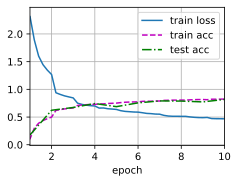

In [23]:
# 训练和评估 LeNet-5 模型
lr, num_epochs = 0.9, 10
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())